# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
        probability: 0.2
    }
}
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).



**Note: need to update pipeline_new.config to make it effective**

### Helper functions

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [11]:
def recenter_image(image):
    # ssd preprocessing

    # NOTE: yes, the value has both negative and positive
    image += [123.68, 116.779, 103.939]
        
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape

    # resize the bboxes            
    # NOTE: I think the right order should be y1, x1, y2, x2
#     bboxes[:, [0, 2]] *= w
#     bboxes[:, [1, 3]] *= h    
    bboxes[:, [0, 2]] *= h
    bboxes[:, [1, 3]] *= w    
    
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):                                
        y1, x1, y2, x2 = bb                        
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    
    print('\n\nbatch')
    print(batch)
    
    print('\n\nbatch0')
    print(batch[0])  
    
    print('\n\nbatch1')
    print(batch[1])    
    
    # QA: why use 0 and 1, respectively?    
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [8]:
from utils import get_train_input

In [9]:
# train_dataset = get_train_input("../solution/pipeline_new.config")
train_dataset = get_train_input("./experiments/reference/pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/train/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', './data/waymo/train/segment-10963653239323173269_1924_000_1944_000_with_camera_labels.tfrecord', './data/waymo/train/segment-11017034898130016754_697_830_717_830_with_camera_labels.tfrecord', './data/waymo/train/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord', './data/waymo/train/segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord', './data/waymo/train/segment-10500357041547037089_1474_800_1494_800_with_camera_labels.tfrecord', './data/waymo/train/segment-10770759614217273359_1465_000_1485_000_with_camera_labels.tfrecord', './data/waymo/train/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord', './data/waymo/train/segment-11199484219241918646_2810_030_2830_030_with_camera_labels.tfrecord', './data/waymo/train/segment-10072140764565668044_4060_000_4080_000_with_camera_label

INFO:tensorflow:Number of filenames to read: 77




batch
({'image': <tf.Tensor: shape=(2, 640, 640, 3), dtype=float32, numpy=
array([[[[  18.966286 ,   55.14483  ,  109.76971  ],
         [  19.617184 ,   55.862495 ,  109.04846  ],
         [  19.749321 ,   56.008186 ,  108.90205  ],
         ...,
         [  27.986778 ,   61.769623 ,  117.13949  ],
         [  27.851255 ,   61.6341   ,  117.00397  ],
         [  28.426079 ,   62.208916 ,  117.57877  ]],

        [[  18.966286 ,   55.14483  ,  109.76971  ],
         [  19.015102 ,   55.198654 ,  109.715614 ],
         [  19.556744 ,   55.74131  ,  110.23636  ],
         ...,
         [  27.986778 ,   61.769623 ,  117.13949  ],
         [  27.838036 ,   61.375748 ,  116.73308  ],
         [  28.386911 ,   61.443478 ,  116.776184 ]],

        [[  19.703823 ,   55.882366 ,  110.50723  ],
         [  18.47769  ,   54.65623  ,  109.281105 ],
         [  19.292221 ,   55.470764 ,  110.09563  ],
         ...,
         [  28.360184 ,   62.14302  ,  117.51288  ],
         [  28.574501 ,   62.

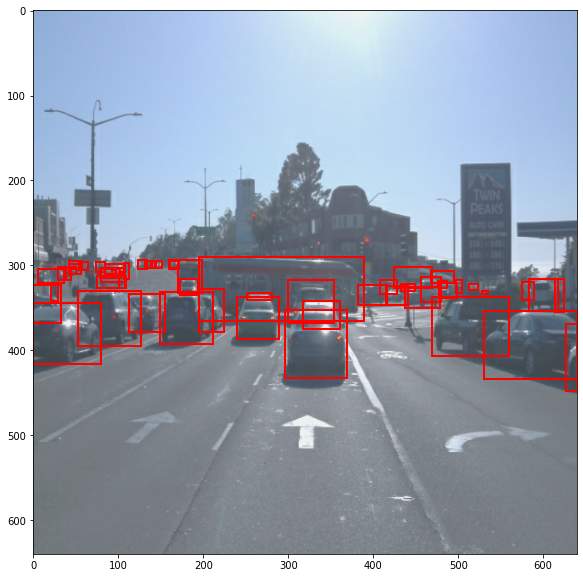

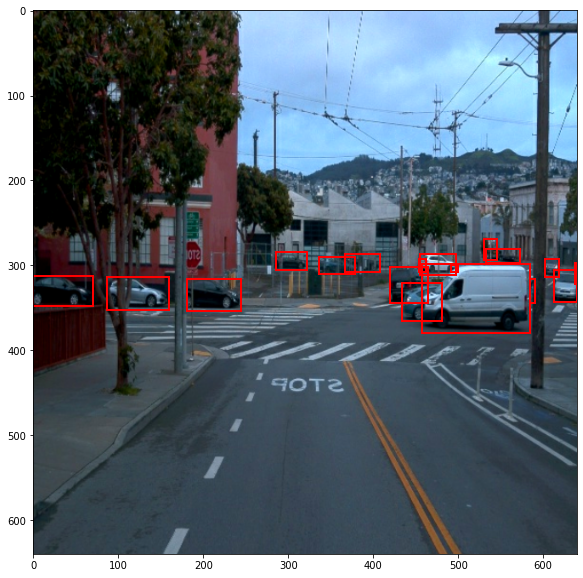

In [18]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)